## **Data Prepocessing**

---



In [ ]:
#Import Data
from google.colab import files
uploaded = files.upload()

Saving bukapedia.csv to bukapedia (1).csv


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
#Load Data
df = pd.read_csv(io.BytesIO(uploaded['bukapedia.csv']))
df.head()

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold,rating,shop_name,subcategory,title,url
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,0,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,0,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,0,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,0,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,0,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...


### **Exploratory Data Analysis**

---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           4503 non-null   object
 1   city               4503 non-null   object
 2   gold_merchant      4503 non-null   bool  
 3   image_url          4503 non-null   object
 4   jumlah_review      4503 non-null   int64 
 5   jumlah_view        4503 non-null   object
 6   location           4503 non-null   object
 7   presentase_diskon  4503 non-null   int64 
 8   price              4503 non-null   int64 
 9   product_id         4503 non-null   int64 
 10  quantity_sold      4503 non-null   int64 
 11  rating             4503 non-null   int64 
 12  shop_name          4503 non-null   object
 13  subcategory        4503 non-null   object
 14  title              4503 non-null   object
 15  url                4503 non-null   object
dtypes: bool(1), int64(6), object(9)
memory usa

In [ ]:
df.describe()

,jumlah_review,presentase_diskon,price,product_id,quantity_sold,rating
count,4503.000000,4503.0,4.503000e+03,4.503000e+03,4503.000000,4503.000000
mean,23.664446,0.0,9.780626e+04,2.822469e+08,69.367311,4.879636
std,71.927542,0.0,8.468117e+04,8.180762e+07,252.428009,0.339455
min,0.000000,0.0,7.500000e+03,1.432960e+06,0.000000,0.000000
25%,3.000000,0.0,5.490000e+04,2.434286e+08,2.000000,5.000000
50%,8.000000,0.0,7.800000e+04,3.025641e+08,12.000000,5.000000
75%,24.000000,0.0,1.190000e+05,3.510548e+08,41.000000,5.000000
max,1629.000000,0.0,2.200000e+06,3.761936e+08,6401.000000,5.000000


In [ ]:
df.columns

Index(['category', 'city', 'gold_merchant', 'image_url', 'jumlah_review',
       'jumlah_view', 'location', 'presentase_diskon', 'price', 'product_id',
       'quantity_sold', 'rating', 'shop_name', 'subcategory', 'title', 'url'],
      dtype='object')

In [ ]:
df.shape

(4503, 16)

### **Data Cleaning**

---



In [ ]:
#Check Missing Value
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

category             0
city                 0
gold_merchant        0
image_url            0
jumlah_review        0
jumlah_view          0
location             0
presentase_diskon    0
price                0
product_id           0
quantity_sold        0
rating               0
shop_name            0
subcategory          0
title                0
url                  0
dtype: int64

In [ ]:
#Check Duplicated Data
df.duplicated(subset='product_id').values.any()

False

In [ ]:
df.duplicated(subset=['product_id','shop_name']).values.any()

False

In [ ]:
#Check Unique Value --> Check Inconsistencies
columns = ['category', 'city', 'gold_merchant', 'image_url', 'jumlah_review','jumlah_view', 'location', 'presentase_diskon', 'price', 'product_id','quantity_sold', 'rating', 'shop_name', 'subcategory', 'title', 'url']

for column in columns:
  print('Jumlah Data Unik dari Kolom', column)
  print(df[column].nunique())

Jumlah Data Unik dari Kolom category
1
Jumlah Data Unik dari Kolom city
53
Jumlah Data Unik dari Kolom gold_merchant
2
Jumlah Data Unik dari Kolom image_url
4486
Jumlah Data Unik dari Kolom jumlah_review
191
Jumlah Data Unik dari Kolom jumlah_view
306
Jumlah Data Unik dari Kolom location
53
Jumlah Data Unik dari Kolom presentase_diskon
1
Jumlah Data Unik dari Kolom price
789
Jumlah Data Unik dari Kolom product_id
4503
Jumlah Data Unik dari Kolom quantity_sold
331
Jumlah Data Unik dari Kolom rating
4
Jumlah Data Unik dari Kolom shop_name
900
Jumlah Data Unik dari Kolom subcategory
47
Jumlah Data Unik dari Kolom title
4296
Jumlah Data Unik dari Kolom url
4503


In [ ]:
df.dtypes

category             object
city                 object
gold_merchant          bool
image_url            object
jumlah_review         int64
jumlah_view          object
location             object
presentase_diskon     int64
price                 int64
product_id            int64
quantity_sold         int64
rating                int64
shop_name            object
subcategory          object
title                object
url                  object
dtype: object

In [ ]:
#Check Unique Value --> Check Inconsistencies

columns = ['category','city','gold_merchant','jumlah_view','location','presentase_diskon','rating','subcategory']

for column in columns:
  print('\nData Unik dari Kolom', column)
  print(df[column].unique())


Data Unik dari Kolom category
['Fashion Wanita']

Data Unik dari Kolom city
['Kota Bandung' 'Jakarta' 'Kota Surakarta' 'Kota Depok' 'Kota Tangerang'
 'Kota Salatiga' 'Kota Tangerang Selatan' 'Kota Surabaya' 'Kab. Bekasi'
 'Kab. Sukoharjo' 'Kota Bekasi' 'Kab. Bandung' 'Kota Pekalongan'
 'Kota Malang' 'Kab. Banyumas' 'Kab. Pekalongan' 'Kab. Kudus'
 'Kota Yogyakarta' 'Kota Cimahi' 'Kab. Garut' 'Kota Batu' 'Kab. Tangerang'
 'Kab. Bandung Barat' 'Kab. Bogor' 'Kota Banjar' 'Kota Batam'
 'Kab. Gianyar' 'Kota Bogor' 'Kab. Sidoarjo' 'Kota Medan' 'Kab. Jepara'
 'Kab. Sleman' 'Kota Denpasar' 'Kab. Magetan' 'Kota Pasuruan'
 'Kab. Klaten' 'Kota Kediri' 'Kab. Pandeglang' 'Kab. Blitar'
 'Kab. Klungkung' 'Kab. Bojonegoro' 'Kab. Sumedang' 'Kab. Bantul'
 'Kota Semarang' 'Kab. Malang' 'Kab. Ponorogo' 'Kab. Nganjuk'
 'Kota Banjarmasin' 'Kab. Batang' 'Kab. Serang' 'Kab. Mojokerto'
 'Kota Cirebon' 'Kab. Sukabumi']

Data Unik dari Kolom gold_merchant
[ True False]

Data Unik dari Kolom jumlah_view
['0' '668

In [ ]:
df['jumlah_view'] = pd.to_numeric(df['jumlah_view'].str.replace(',', ''))
df['jumlah_view'].unique()

array([    0,   668,   450,   373,   291,    67,    42,  2400,  2300,
        1700,  1400,  1100,   680,   660,    55,    53,  3700,  3000,
        2500,  1300,  1000,   997,   915,   757,   748,   348,  3100,
        2800,  1200,   362,   302,  1600,   968,   936,   703,   664,
         511,   493,   304,   276,   254,  2000,  1900,  1800,   978,
         735,   701,   690,   530,   255, 11500,   307,  2600,   641,
       14100, 16100,  4300,   187,   615,   378,   374,   122,  8000,
        5200,   329,  7700,  6600, 25300, 16500,   882,   143,  7400,
        3500,   797,  5800,  5900,  2900,  7600,  4900,  6100,  1500,
         889,  6200,  6300,  5100,   275,  9400, 11100,  8400,   114,
       15100, 11800,  4100, 16800, 12400,  8800,  9500,  3200,  5600,
       20900,  6400, 14000,  3900, 10500,  7500, 25200, 15800, 23800,
        6700,  2700, 22100,  5700,  9600, 16400, 24800, 19600, 21000,
       18500,   285,    74, 18100, 13600,  7100, 22800, 47700, 44000,
       20200, 15600,

In [ ]:
df.dtypes

category             object
city                 object
gold_merchant          bool
image_url            object
jumlah_review         int64
jumlah_view           int64
location             object
presentase_diskon     int64
price                 int64
product_id            int64
quantity_sold         int64
rating                int64
shop_name            object
subcategory          object
title                object
url                  object
dtype: object

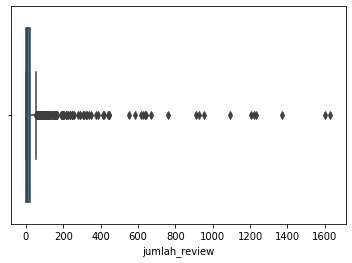

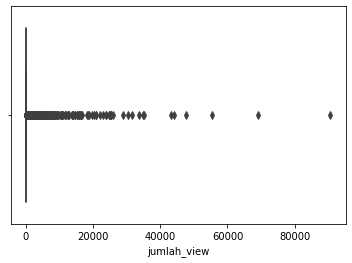

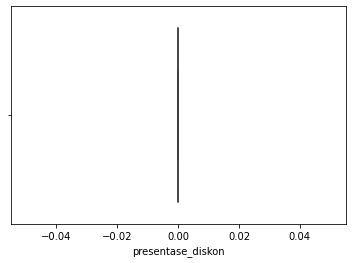

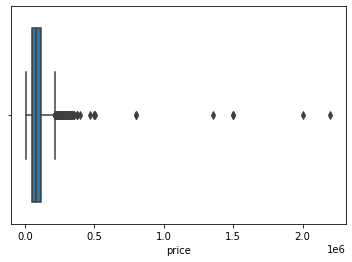

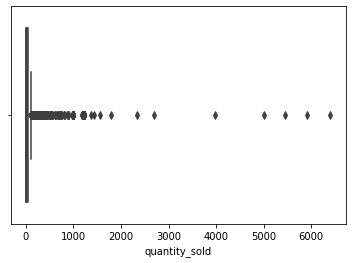

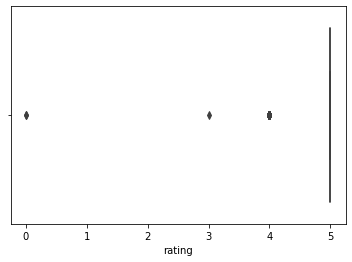

In [ ]:
#Check Outliers
numerical_columns = ['jumlah_review','jumlah_view','presentase_diskon','price','quantity_sold','rating']

for column in numerical_columns:
  plt.figure()
  sns.boxplot(x=df[column])
  plt.show()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))

outliers_columns = ['jumlah_review','jumlah_view','price','quantity_sold','rating']

for column in outliers_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  maximum_value = Q3 + 1.5*IQR
  minimum_value = Q1 - 1.5*IQR
  filtered_entries = ((df[column] >= minimum_value) & (df[column] <= maximum_value)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 4503
Jumlah baris setelah memfilter outlier: 2709


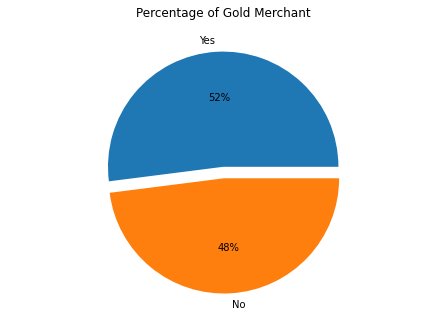

In [ ]:
#Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df.gold_merchant.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%', explode=[0,0.1])
plt.title('Percentage of Gold Merchant')
plt.show()

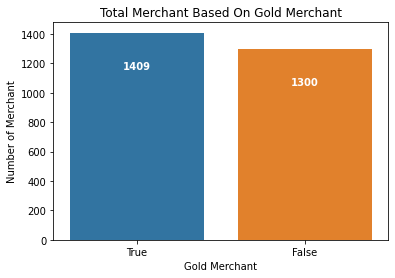

In [ ]:
#Count Plot
plt.figure()
plt.title('Total Merchant Based On Gold Merchant')
ax = sns.countplot(x='gold_merchant', data= df, order=df['gold_merchant'].value_counts(ascending=False).index)
plt.xlabel('Gold Merchant')
plt.ylabel('Number of Merchant')

for p, label in zip(ax.patches, df['gold_merchant'].value_counts().values):
    ax.annotate(label, (p.get_x()+0.4, p.get_height()-250), weight='bold', color='white', ha='center')

plt.show()

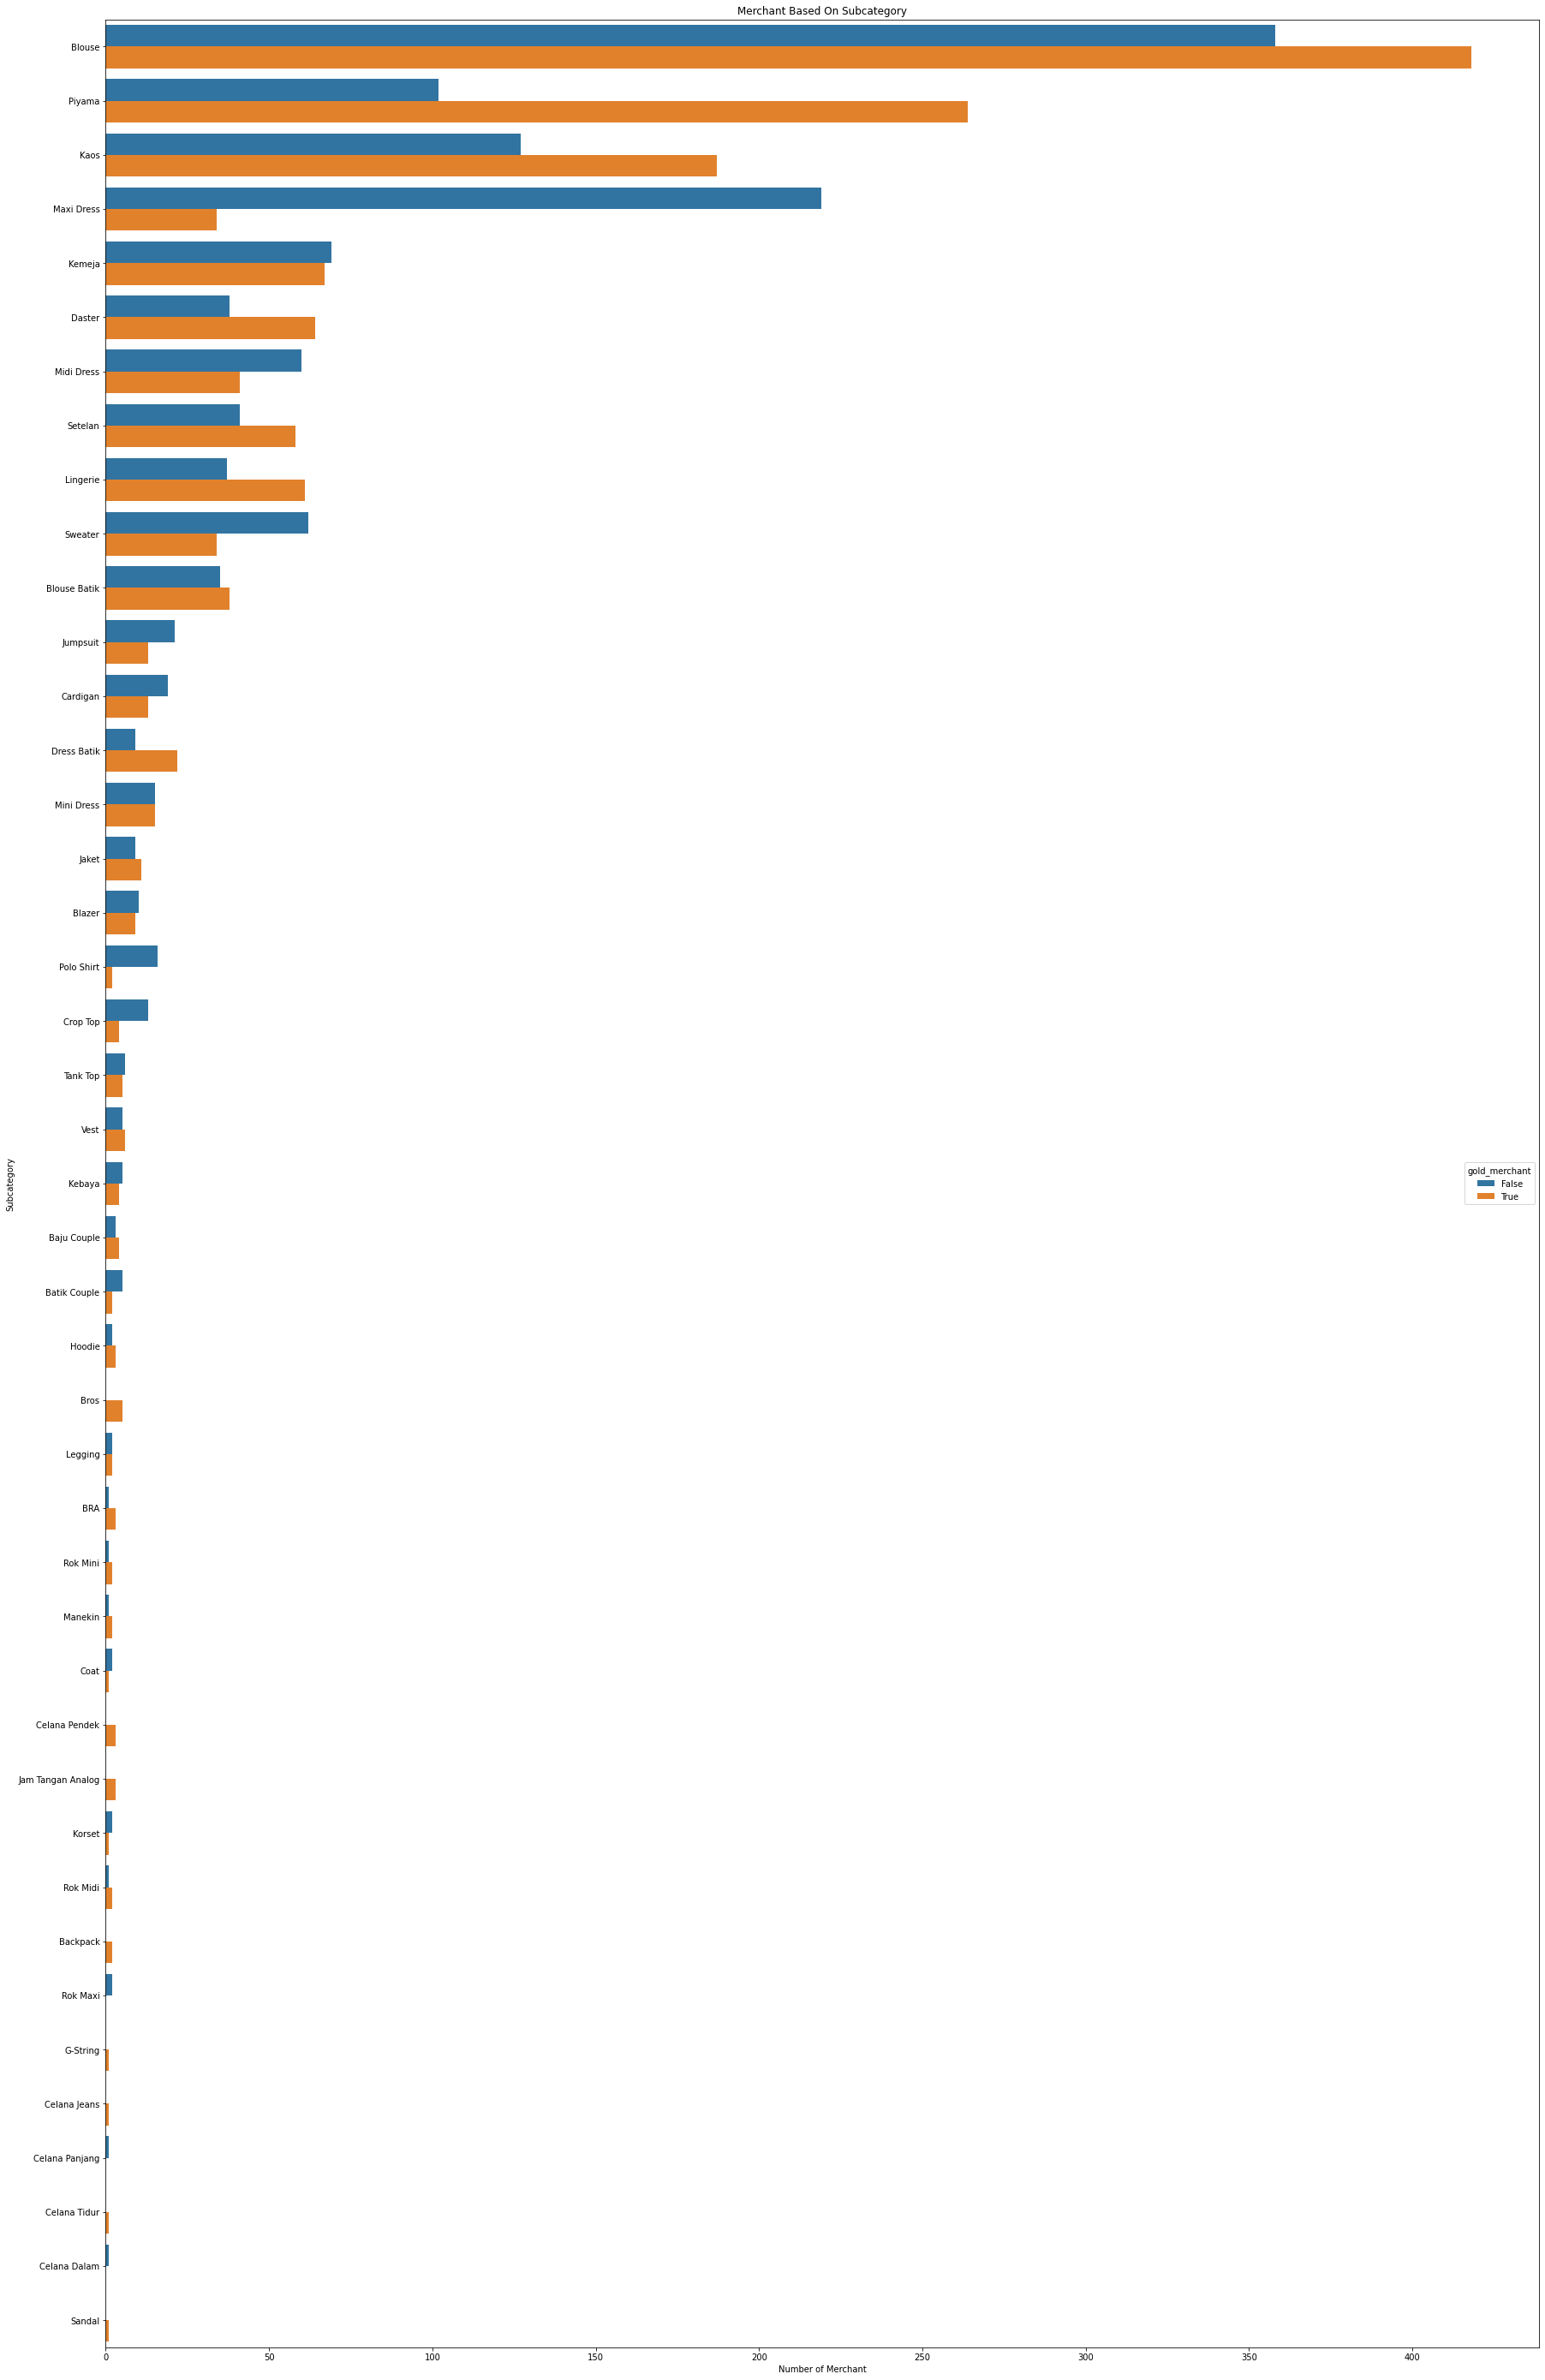

In [ ]:
#Count Plot
plt.figure(figsize=(30,50))
plt.title('Merchant Based On Subcategory')
sns.countplot(y='subcategory', hue='gold_merchant', data= df, order=df['subcategory'].value_counts(ascending=False).index)
plt.xlabel('Number of Merchant')
plt.ylabel('Subcategory')
plt.show()

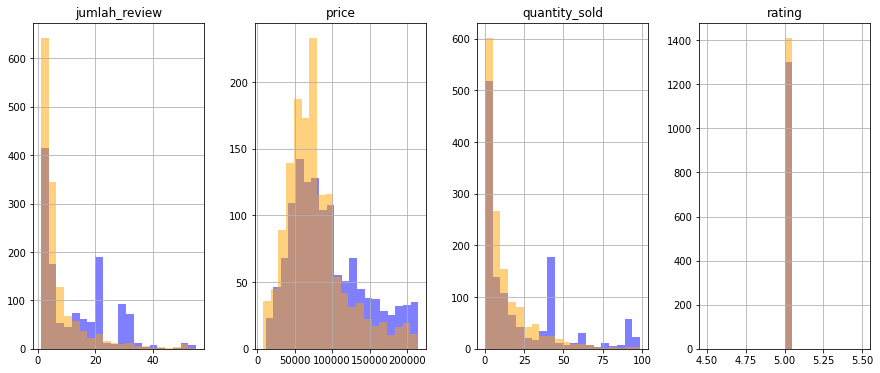

In [ ]:
#Subplots : membuat gambar dan satu set subplot
numerical_features = ['jumlah_review','price','quantity_sold','rating']
fig, ax = plt.subplots(1, 4, figsize=(15, 6))

df[df.gold_merchant == False][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.gold_merchant == True][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)

plt.show()

### **Drop Unecessary Columns**

---



In [ ]:
#Drop : menghapus kolom
df = df.drop(['product_id','image_url','url','category','presentase_diskon','title'], axis=1)
df.head()

,city,gold_merchant,jumlah_review,jumlah_view,location,price,quantity_sold,rating,shop_name,subcategory
5,Jakarta,True,1,0,Jakarta,92000,0,5,Amelie Butik Wholesale,Celana Pendek
7,Jakarta,True,1,0,Jakarta,43750,0,5,LEMONE,Kaos
8,Kota Surakarta,True,1,0,Kota Surakarta,209000,0,5,Pusat Batik Sarimbit,Batik Couple
9,Kota Surakarta,True,1,0,Kota Surakarta,159000,0,5,Pusat Batik Sarimbit,Batik Couple
10,Kota Bandung,True,4,0,Kota Bandung,215000,0,5,FashionOnline,Jaket


### **Normalization and Standardization**

---



In [ ]:
df.describe()

,jumlah_review,jumlah_view,price,quantity_sold,rating
count,2709.000000,2709.0,2709.000000,2709.000000,2709.0
mean,9.824659,0.0,85870.148763,16.542267,5.0
std,10.533125,0.0,45034.023516,22.496417,0.0
min,1.000000,0.0,7500.000000,0.000000,5.0
25%,2.000000,0.0,54900.000000,1.000000,5.0
50%,5.000000,0.0,76500.000000,7.000000,5.0
75%,16.000000,0.0,105000.000000,23.000000,5.0
max,55.000000,0.0,215000.000000,99.000000,5.0


In [ ]:
#Normalization and Standardization
df['jumlah_view'] = MinMaxScaler().fit_transform(df['jumlah_view'].values.reshape(len(df),1))
df['jumlah_review'] = MinMaxScaler().fit_transform(df['jumlah_review'].values.reshape(len(df),1))
df['price'] = StandardScaler().fit_transform(df['price'].values.reshape(len(df),1))
df['quantity_sold'] = MinMaxScaler().fit_transform(df['quantity_sold'].values.reshape(len(df),1))
df['rating'] = StandardScaler().fit_transform(df['rating'].values.reshape(len(df),1))

In [ ]:
df.describe()

,jumlah_review,jumlah_view,price,quantity_sold,rating
count,2709.000000,2709.0,2.709000e+03,2709.000000,2709.0
mean,0.163420,0.0,-4.196635e-17,0.167094,0.0
std,0.195058,0.0,1.000185e+00,0.227237,0.0
min,0.000000,0.0,-1.740564e+00,0.000000,0.0
25%,0.018519,0.0,-6.878325e-01,0.010101,0.0
50%,0.074074,0.0,-2.081066e-01,0.070707,0.0
75%,0.277778,0.0,4.248651e-01,0.232323,0.0
max,1.000000,0.0,2.867914e+00,1.000000,0.0


### **Feature Encoding**

---



In [ ]:
df.dtypes

city              object
gold_merchant       bool
jumlah_review    float64
jumlah_view      float64
location          object
price            float64
quantity_sold    float64
rating           float64
shop_name         object
subcategory       object
dtype: object

In [ ]:
#Feature Encoding --> one hot encoding
categorical_columns = ['city','gold_merchant','location','shop_name','subcategory']

for col in categorical_columns:
  df[col] = df[col].astype('category')

# for cat in categorical_columns:
#   onehots = pd.get_dummies(df[cat], prefix=cat)
#   df = df.join(onehots)

df.dtypes

city             category
gold_merchant    category
jumlah_review     float64
jumlah_view       float64
location         category
price             float64
quantity_sold     float64
rating            float64
shop_name        category
subcategory      category
dtype: object

In [ ]:
for col in categorical_columns:
  df[col] = df[col].cat.codes

df.head()

,city,gold_merchant,jumlah_review,jumlah_view,location,price,quantity_sold,rating,shop_name,subcategory
5,0,1,0.000000,0.0,0,0.136141,0.0,0.0,30,12
7,0,1,0.000000,0.0,0,-0.935469,0.0,0.0,282,23
8,40,1,0.000000,0.0,40,2.734656,0.0,0.0,394,3
9,40,1,0.000000,0.0,40,1.624180,0.0,0.0,394,3
10,23,1,0.055556,0.0,23,2.867914,0.0,0.0,178,20


In [ ]:
df = df.drop(['jumlah_view','rating'], axis=1)

In [ ]:
#Check Correlation
df.corr()

,city,gold_merchant,jumlah_review,location,price,quantity_sold,shop_name,subcategory
city,1.000000,-0.034136,-0.161816,1.000000,0.090800,-0.115079,0.117555,-0.029326
gold_merchant,-0.034136,1.000000,-0.282675,-0.034136,-0.180056,-0.213825,-0.122836,-0.034589
jumlah_review,-0.161816,-0.282675,1.000000,-0.161816,0.048752,0.569030,-0.044164,0.061986
location,1.000000,-0.034136,-0.161816,1.000000,0.090800,-0.115079,0.117555,-0.029326
price,0.090800,-0.180056,0.048752,0.090800,1.000000,0.079663,-0.002082,0.153987
quantity_sold,-0.115079,-0.213825,0.569030,-0.115079,0.079663,1.000000,-0.018891,0.097685
shop_name,0.117555,-0.122836,-0.044164,0.117555,-0.002082,-0.018891,1.000000,0.092682
subcategory,-0.029326,-0.034589,0.061986,-0.029326,0.153987,0.097685,0.092682,1.000000


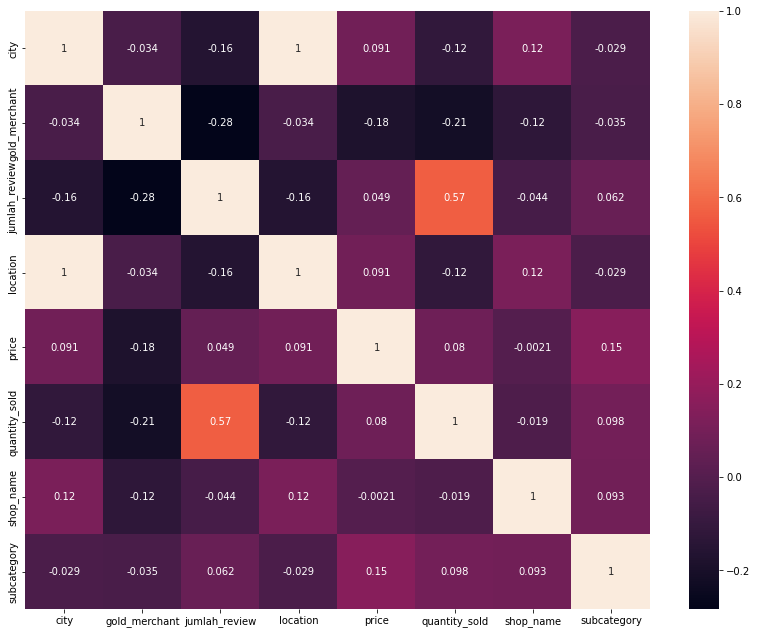

In [ ]:
plt.figure(figsize=(14,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

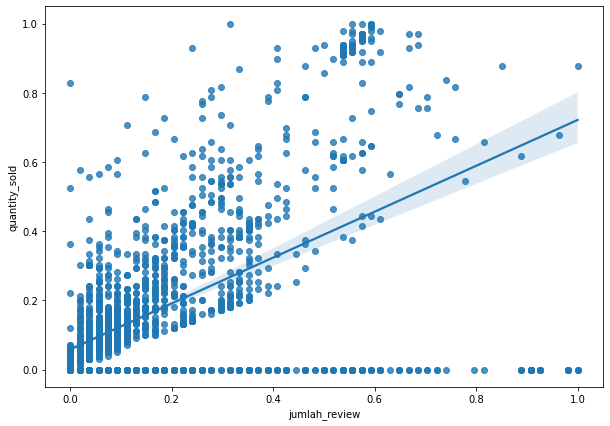

In [ ]:
plt.figure(figsize = (10,7))
sns.regplot(x='jumlah_review',y='quantity_sold', data=df)
plt.show()

## **Modelling and Evaluation**

---



### **Train Test Split**

---



In [ ]:
X = df.drop(['gold_merchant','price'], axis=1)
y = df['gold_merchant']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Gold Merchant di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Gold Merchant di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (1896, 6) , sedangkan Jumlah baris dan kolom dari y_train adalah: (1896,)
Prosentase Gold Merchant di data Training adalah:
1    0.530063
0    0.469937
Name: gold_merchant, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (813, 6) , sedangkan Jumlah baris dan kolom dari y_test adalah: (813,)
Prosentase Gold Merchant di data Testing adalah:
0    0.503075
1    0.496925
Name: gold_merchant, dtype: float64


In [ ]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(2709, 2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Gold Merchant di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Gold Merchant di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (1896, 2) , sedangkan Jumlah baris dan kolom dari y_train adalah: (1896,)
Prosentase Gold Merchant di data Training adalah:
1    0.530063
0    0.469937
Name: gold_merchant, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (813, 2) , sedangkan Jumlah baris dan kolom dari y_test adalah: (813,)
Prosentase Gold Merchant di data Testing adalah:
0    0.503075
1    0.496925
Name: gold_merchant, dtype: float64


### **Algoritma Klasifikasi: Logistic Regression**

---



In [ ]:
#Train the model
log_model = LogisticRegression().fit(x_train, y_train)
#Predict
y_train_pred = log_model.predict(x_train)

#Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))
print('\nAccuracy Score Training (Logistic Regression): %.3f%%' % (accuracy_score(y_train, y_train_pred)*100.0))
print('\n')

# Predict
y_test_pred = log_model.predict(x_test)

# Print classification report 
print('\nClassification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score Testing (Logistic Regression): %.3f%%' % (accuracy_score(y_test, y_test_pred)*100.0))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.56      0.41      0.48       891
           1       0.58      0.71      0.64      1005

    accuracy                           0.57      1896
   macro avg       0.57      0.56      0.56      1896
weighted avg       0.57      0.57      0.56      1896


Accuracy Score Training (Logistic Regression): 57.278%



Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.61      0.42      0.50       409
           1       0.55      0.73      0.63       404

    accuracy                           0.57       813
   macro avg       0.58      0.57      0.56       813
weighted avg       0.58      0.57      0.56       813


Accuracy Score Testing (Logistic Regression): 57.319%


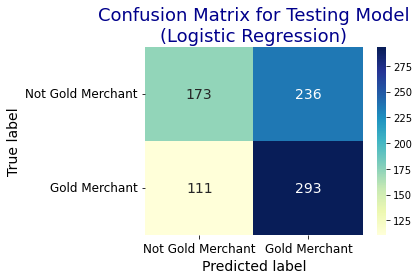

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Not Gold Merchant', 'Gold Merchant'), ('Not Gold Merchant', 'Gold Merchant'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### **Algoritma Klasifikasi: KNeighborsClassifier**

---

In [ ]:
knn_model = KNeighborsClassifier().fit(x_train, y_train)

#Predict
y_train_pred = knn_model.predict(x_train)

#Print classification report 
print('Classification Report Training Model (KNeighbors Classifier):')
print(classification_report(y_train, y_train_pred))
print('\nAccuracy Score Training (KNeighbors Classifier): %.3f%%' % (accuracy_score(y_train, y_train_pred)*100.0))
print('\n')

# Predict
y_test_pred = knn_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (KNeighbors Classifier):')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score Testing (KNeighbors Classifier): %.3f%%' % (accuracy_score(y_test, y_test_pred)*100.0))

Classification Report Training Model (KNeighbors Classifier):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       891
           1       0.91      0.94      0.92      1005

    accuracy                           0.92      1896
   macro avg       0.92      0.91      0.92      1896
weighted avg       0.92      0.92      0.92      1896


Accuracy Score Training (KNeighbors Classifier): 91.614%


Classification Report Testing Model (KNeighbors Classifier):
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       409
           1       0.83      0.88      0.85       404

    accuracy                           0.85       813
   macro avg       0.85      0.85      0.85       813
weighted avg       0.85      0.85      0.85       813


Accuracy Score Testing (KNeighbors Classifier): 85.117%


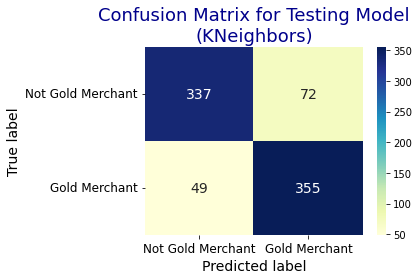

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Not Gold Merchant', 'Gold Merchant'), ('Not Gold Merchant', 'Gold Merchant'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(KNeighbors)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### **Algoritma Klasifikasi: RandomForestClassifier**

---

In [ ]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)

#Predict
y_train_pred = rdf_model.predict(x_train)

#Print classification report 
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))
print('\nAccuracy Score Training (Random Forest Classifier): %.3f%%' % (accuracy_score(y_train, y_train_pred)*100.0))
print('\n')

# Predict
y_test_pred = rdf_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score Testing (Random Forest Classifier): %.3f%%' % (accuracy_score(y_test, y_test_pred)*100.0))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       891
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      1896
   macro avg       1.00      1.00      1.00      1896
weighted avg       1.00      1.00      1.00      1896


Accuracy Score Training (Random Forest Classifier): 99.895%


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       409
           1       0.89      0.92      0.91       404

    accuracy                           0.91       813
   macro avg       0.91      0.91      0.91       813
weighted avg       0.91      0.91      0.91       813


Accuracy Score Testing (Random Forest Classifier): 90.529%


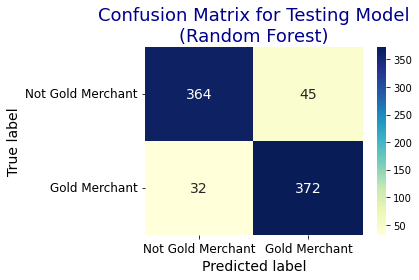

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Not Gold Merchant', 'Gold Merchant'), ('Not Gold Merchant', 'Gold Merchant'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### **Algoritma Klasifikasi: DecisionTreeClassifier**

---



In [ ]:
dct_model = DecisionTreeClassifier().fit(x_train, y_train)

# Predict
y_train_pred = dct_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred))
print('\nAccuracy Score Training (Decision Tree Classifier): %.3f%%' % (accuracy_score(y_train, y_train_pred)*100.0))
print('\n')

# Predict
y_test_pred = dct_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score Testing (Decision Tree Classifier): %.3f%%' % (accuracy_score(y_test, y_test_pred)*100.0))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       891
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      1896
   macro avg       1.00      1.00      1.00      1896
weighted avg       1.00      1.00      1.00      1896


Accuracy Score Training (Decision Tree Classifier): 99.895%


Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       409
           1       0.89      0.93      0.91       404

    accuracy                           0.91       813
   macro avg       0.91      0.91      0.91       813
weighted avg       0.91      0.91      0.91       813


Accuracy Score Testing (Decision Tree Classifier): 91.021%


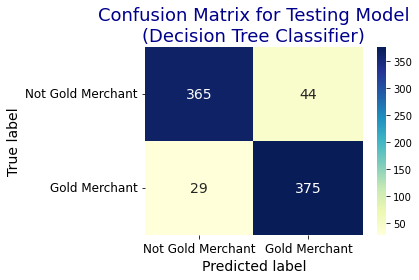

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Not Gold Merchant', 'Gold Merchant'), ('Not Gold Merchant', 'Gold Merchant'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### **Algoritma Klasifikasi GradientBoostingClassifier**

---



In [ ]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_train_pred = gbt_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))
print('\nAccuracy Score Training (Gradient Boosting): %.3f%%' % (accuracy_score(y_train, y_train_pred)*100.0))
print('\n')

# Predict
y_test_pred = gbt_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score Testing (Gradient Boosting): %.3f%%' % (accuracy_score(y_test, y_test_pred)*100.0))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       891
           1       0.89      0.88      0.88      1005

    accuracy                           0.88      1896
   macro avg       0.88      0.88      0.88      1896
weighted avg       0.88      0.88      0.88      1896


Accuracy Score Training (Gradient Boosting): 87.764%


Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       409
           1       0.82      0.80      0.81       404

    accuracy                           0.81       813
   macro avg       0.81      0.81      0.81       813
weighted avg       0.81      0.81      0.81       813


Accuracy Score Testing (Gradient Boosting): 80.935%


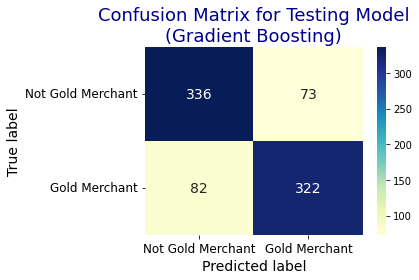

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Not Gold Merchant', 'Gold Merchant'), ('Not Gold Merchant', 'Gold Merchant'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## **Validation**

---



In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
model = log_model
result = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy')
print("Accuracy Logistic Regression Model: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy Logistic Regression Model: 54.595% (1.837%)


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
model = knn_model
result = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy')
print("Accuracy KNeighbors Model: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy KNeighbors Model: 87.892% (2.298%)


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
model = rdf_model
result = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy')
print("Accuracy Random Forest Model: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy Random Forest Model: 93.540% (1.451%)


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
model = dct_model
result = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy')
print("Accuracy Decision Tree Model: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy Decision Tree Model: 93.170% (2.143%)


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
model = gbt_model
result = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy')
print("Accuracy Gradient Boosting Model: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy Gradient Boosting Model: 83.057% (2.731%)
